In [1]:
import sys

sys.path.append("..")

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1,0"

In [3]:
from data.dataloader import LowLightDataModule
from model.blocks.lowlightenhancer import LowLightEnhancer
from utils.utils import show_batch, summarize_model

/home/user/anaconda3/envs/jih_icicic/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_module = LowLightDataModule(
    train_dir="../data/1_train",
    valid_dir="../data/2_valid",
    bench_dir="../data/3_bench",
    infer_dir="../data/4_infer",
    image_size=512,
    batch_size=1,
    num_workers=4,
)

data_module.setup()

In [5]:
train_dataloader = data_module.train_dataloader()

torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])


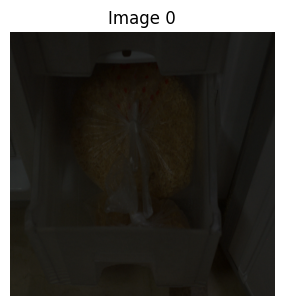

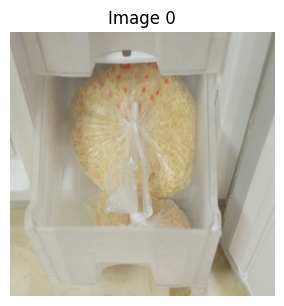

In [6]:
train_low, train_high = next(iter(train_dataloader))
print(train_low.shape)
print(train_high.shape)
show_batch(images=train_low)
show_batch(images=train_high)

In [7]:
lowlightenhancer = LowLightEnhancer(
    hidden_channels=64,
    num_resolution=4,
    dropout_ratio=0.2,
    raw_cutoff=0.5,
    offset=0.1,
    trainable=False,
)

In [8]:
train_low = train_low.cuda()
lowlightenhancer = lowlightenhancer.cuda()

In [9]:
results = lowlightenhancer(train_low)

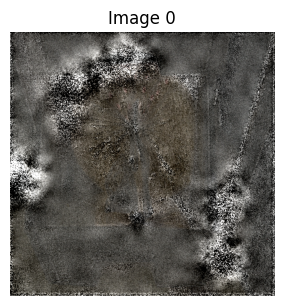

In [10]:
show_batch(images=results["enhanced"]["rgb"])

In [11]:
lowlightenhancer = LowLightEnhancer(
    hidden_channels=64,
    num_resolution=4,
    dropout_ratio=0.2,
    raw_cutoff=0.5,
    offset=0.1,
    trainable=True,
)

In [12]:
train_low = train_low.cuda()
lowlightenhancer = lowlightenhancer.cuda()

In [13]:
results = lowlightenhancer(train_low)

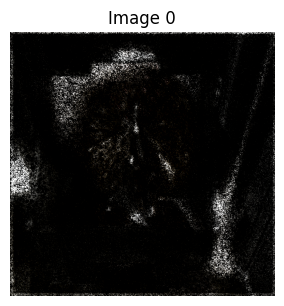

In [14]:
show_batch(images=results["enhanced"]["rgb"])

In [15]:
summarize_model(model=lowlightenhancer, input_size=(1, 3, 256, 256))

Layer (type:depth-idx)                        Output Shape              Param #
LowLightEnhancer                              [1, 1, 256, 256]          --
├─ImageDecomposition: 1-1                     [1, 1, 256, 256]          5
│    └─RGB2YCrCbBlock: 2-1                    [1, 1, 256, 256]          1
│    └─HomomorphicSeparationBlock: 2-2        [1, 1, 256, 256]          1
├─FeatureRestorationBlock: 1-2                [1, 1, 256, 256]          --
│    └─DenoisingBlock: 2-3                    [1, 1, 256, 256]          --
│    │    └─DoubleConv: 3-1                   [1, 1, 256, 256]          38,478
│    │    └─DoubleConv: 3-2                   [1, 1, 256, 256]          38,478
│    │    └─DoubleConv: 3-3                   [1, 1, 256, 256]          38,478
│    └─ColorCorrectionBlock: 2-4              [1, 1, 256, 256]          38,478
│    │    └─DoubleConv: 3-4                   [1, 1, 256, 256]          38,478
│    │    └─DoubleConv: 3-5                   [1, 1, 256, 256]          38,478